# Exercise 4.10. 
## This script contains the following:

## 01 Importing libraries and the data set
## 02 Data Segmentation based on region (Q3)
### 02a. Segmentation based on Northeast, Midwest, South, West (Q3a)
### 02b. Creating a crosstab to spender flag (Q3b)
## 03 Creating an exclusion flag for low spenders (Q4)
### 03a. Exporting low activity customer data
## 04 Customer profiling (Q5 and Q6)
### 04a. Checking distribution based on age
### 04b. Checking distribution based on income
### 04c. Checking distribution based on department
### 04d. Checking distribution based on orders during the days of the week
### 04e. Checking distribution based on order hour of day
## 05 Aggregating the max, mean and min variables on a customer-profile level (Q7)
## 06 Comparing customer profiles with regions and departments (Q8)
## 07 Comparing age group vs income of customers

# 01 Importing libraries and the data set

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#Importing the small downsampled data set created
path = r'/Users/renubalaji/Documents/CareerFoundry/Python/Instacart Basket Analysis'
data_set = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_ords_prods_cust_small.pkl'))

In [3]:
data_set.head()

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 02 Data segmentation based on region

Citation: List of regions of the United States. (2022, May 23). In Wikipedia. https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

## 02a. Segmentation based on Northeast, Midwest, South, West

In [4]:
# Region 1 - Northeast

data_set.loc[data_set['state'].isin([
    'Maine',
    'New Hampshire',
    'Vermont',
    'Massachusetts',
    'Rhode Island',
    'Connecticut',
    'New York',
    'Pennsylvania',
    'New Jersey']), 'region'] = "Northeast"

In [5]:
# Region 2 - Midwest

data_set.loc[data_set['state'].isin([
        'Wisconsin',
        'Michigan',
        'Illinois',
        'Indiana',
        'Ohio',
        'North Dakota',
        'South Dakota',
        'Nebraska',
        'Kansas',
        'Minnesota',
        'Iowa',
        'Missouri' ]), 'region'] = "Midwest"

In [6]:
# Region 3 - South

data_set.loc[data_set['state'].isin([
        'Delaware',
        'Maryland',
        'District of Columbia',
        'Virginia',
        'West Virginia',
        'North Carolina',
        'South Carolina',
        'Georgia',
        'Florida',
        'Kentucky',
        'Tennessee',
        'Mississippi',
        'Alabama',
        'Oklahoma',
        'Texas',
        'Arkansas',
        'Louisiana' ]), 'region'] = "South"

In [7]:
# Region 4 - West

data_set.loc[data_set['state'].isin([
        'Idaho',
        'Montana',
        'Wyoming',
        'Nevada',
        'Utah',
        'Colorado',
        'Arizona',
        'New Mexico',
        'Alaska',
        'Washington',
        'Oregon',
        'California',
        'Hawaii' ]), 'region'] = "West"

In [8]:
data_set[('region')].value_counts()

South        3239999
West         2489681
Midwest      2280489
Northeast    1719560
Name: region, dtype: int64

## 02b. Creating a crosstab to spender_flag

In [9]:
data_set['mean_product_price'] = data_set.groupby(['user_id'])['prices'].transform(np.mean)

In [14]:
data_set.loc[data_set['mean_product_price'] >= 10, 'spending_flag'] = 'High spender'

In [15]:
data_set.loc[data_set['mean_product_price'] < 10, 'spending_flag'] = 'Low spender'

In [16]:
data_set['spending_flag'].value_counts(dropna = False)

Low spender     9531393
High spender     198336
Name: spending_flag, dtype: int64

In [17]:
data_set.columns

Index(['department_id', 'prices', 'order_id', 'eval_set', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'reordered',
       'price_range_loc', 'busiest day', 'busiest_days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'region'],
      dtype='object')

In [18]:
# Creating crosstab using region and spender_flag

crosstab_region_spending = pd.crosstab(data_set['region'], data_set['spending_flag'], dropna = False)

In [19]:
# Checking result of crosstab

crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,48292,2232197
Northeast,34439,1685121
South,66928,3173071
West,48677,2441004


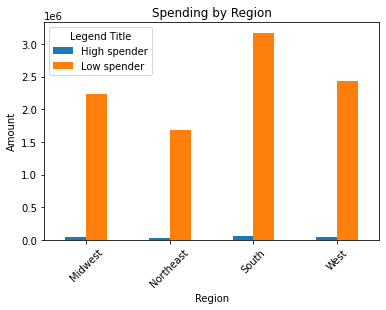

In [22]:
# Plotting the bar chart
Bar3 = crosstab_region_spending.plot(kind='bar')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Spending by Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding legend
plt.legend(title='Legend Title')

# Save the figure
Bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_by_region.png'), bbox_inches='tight')

# Show the plot (optional, useful for interactive sessions)
plt.show()

## 03. Creating a exclusion_flag for low spenders

In [26]:
data_set[('max_order')].value_counts()

99    351545
8     244246
9     243837
6     243157
7     241652
       ...  
93     15212
90     14662
97     13594
98     13518
96     12093
Name: max_order, Length: 97, dtype: int64

In [27]:
#Creating exclusion flag column

data_set.loc[data_set['max_order']<5, 'exclusion_flag']='low_orders'
data_set.loc[data_set['max_order']>=5, 'exclusion_flag']='high_orders'

In [28]:
data_set['exclusion_flag'].value_counts(dropna = False)

high_orders    9298445
low_orders      431284
Name: exclusion_flag, dtype: int64

In [29]:
#Creating dataframe with low activity customers

df_low_activity = data_set[data_set['exclusion_flag'] =='low_orders']

In [30]:
#Creating dataframe with high activity customers

df_regular_activity = data_set[data_set['exclusion_flag'] =='high_orders']

In [31]:
# Checking dataframe

df_low_activity[('max_order')].value_counts()

4    225583
3    205701
Name: max_order, dtype: int64

### 03a. Exporting low activity customer data

In [32]:
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

## 04 Customer profiling

In [33]:
df_regular_activity.shape

(9298445, 30)

In [34]:
df_regular_activity.columns

Index(['department_id', 'prices', 'order_id', 'eval_set', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'reordered',
       'price_range_loc', 'busiest day', 'busiest_days',
       'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'region', 'exclusion_flag'],
      dtype='object')

In [35]:
df_regular_activity.head(5)

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high_orders
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high_orders
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high_orders
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high_orders
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high_orders


In [37]:
df_regular_activity.describe

<bound method NDFrame.describe of          department_id  prices  order_id eval_set  orders_day_of_week  \
user_id                                                                 
1                    7     9.0   2539329    prior                   2   
1                    7     9.0    473747    prior                   3   
1                    7     9.0   2254736    prior                   4   
1                    7     9.0    550135    prior                   1   
1                   19     3.0   2398795    prior                   3   
...                ...     ...       ...      ...                 ...   
99999                4     7.9   1968471    prior                   1   
99999                4     7.9    403464    prior                   5   
99999               16     5.7   2053578    prior                   5   
99999                4     4.0    438388    prior                   1   
99999                3     4.7    818083    prior                   6   

         order_h

### 04a. Checking distribution based on age

In [89]:
df_regular_activity.loc[df_regular_activity['age'] <= 30, 'age_group'] = 'Young Adult'
df_regular_activity.loc[(df_regular_activity['age'] > 30) & (df_regular_activity['age'] < 60), 'age_group'] = 'Middle-aged Adult'
df_regular_activity.loc[df_regular_activity['age'] >= 60, 'age_group'] = 'Senior'

/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [90]:
df_regular_activity.head()

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,fam_status,income,_merge,region,exclusion_flag,age_group,income_groups,departmental_groups,day_group,hour_group
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Noon_orders
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Food_items,Weekday,Night_orders


In [91]:
df_regular_activity['age_group'].value_counts(dropna = False)

Middle-aged Adult    4230593
Senior               3175969
Young Adult          1891883
Name: age_group, dtype: int64

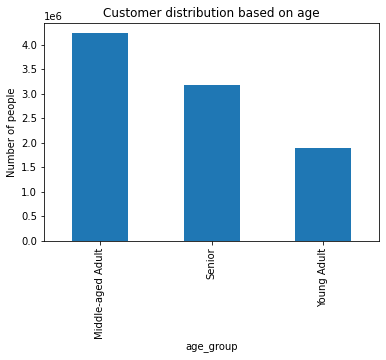

In [46]:
# Adding labels and title
plt.xlabel('age_group')
plt.ylabel('Number of people')
plt.title('Customer distribution based on age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar = df_regular_activity ['age_group'].value_counts().plot.bar()

In [47]:
#Exporting the figure
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_activity.png'))

### 04b. Checking distribution based on income

In [48]:
df_regular_activity.loc[df_regular_activity['income'] <= 50000, 'income_groups'] = 'Low_income'
df_regular_activity.loc[(df_regular_activity['income'] > 50000) & (df_regular_activity['income'] < 100000), 'income_groups'] = 'Middle_income'
df_regular_activity.loc[df_regular_activity['income'] >= 100000, 'income_groups'] = 'High_income'

/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [49]:
df_regular_activity.head(5)

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_groups
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,31,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,31,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,31,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,31,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,31,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income


In [128]:
df_regular_activity['income_groups'].value_counts(dropna = False)

High_income      4264761
Middle_income    4023747
Low_income       1009937
Name: income_groups, dtype: int64

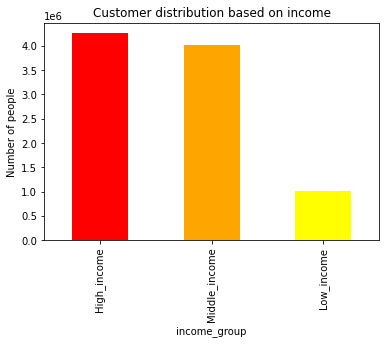

In [50]:
# Adding labels and title
plt.xlabel('income_group')
plt.ylabel('Number of people')
plt.title('Customer distribution based on income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar = df_regular_activity ['income_groups'].value_counts().plot.bar(color=['red', 'orange', 'yellow'])

In [51]:
#Exporting the figure
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group_activity.png'))

### 04c. Checking distribution based on department

In [52]:
print(df_regular_activity['department_id'].unique())

[ 7 19  4 14 16 13 20 12  1 15 21  6  3 17  9 11  5 18 10  2  8]


In [53]:
# Assigning 'departmental_groups' based on 'department_id'
df_regular_activity.loc[df_regular_activity['department_id'].isin([1, 3, 4, 9, 12, 13, 14, 15, 16, 19, 20]), 'departmental_groups'] = 'Food_items'
df_regular_activity.loc[df_regular_activity['department_id'].isin([5, 7]), 'departmental_groups'] = 'Beverages'
df_regular_activity.loc[df_regular_activity['department_id'].isin([2, 6, 8, 10, 11, 17, 18, 21]), 'departmental_groups'] = 'Others'

/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [54]:
df_regular_activity.head(5)

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_groups,departmental_groups
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,2/17/2019,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Food_items


In [55]:
df_regular_activity['departmental_groups'].value_counts(dropna = False)

Food_items    7880511
Beverages      813770
Others         604164
Name: departmental_groups, dtype: int64

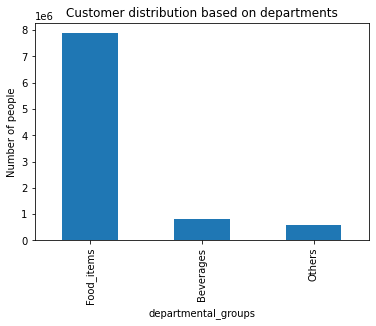

In [56]:
# Adding labels and title
plt.xlabel('departmental_groups')
plt.ylabel('Number of people')
plt.title('Customer distribution based on departments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar = df_regular_activity ['departmental_groups'].value_counts().plot.bar()

In [57]:
#Exporting the figure
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departmental_groups.png'))

### 04d. Checking distribution based on orders during the days of the week

In [58]:
print(df_regular_activity['orders_day_of_week'].unique())

[2 3 4 1 5 0 6]


In [59]:
df_regular_activity.loc[df_regular_activity['orders_day_of_week'].isin([0,6]), 'day_group'] = 'Weekend'
df_regular_activity.loc[df_regular_activity['orders_day_of_week'].isin([1,2,3,4,5]), 'day_group'] = 'Weekday'

/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [60]:
df_regular_activity.head(5)

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group,income_groups,departmental_groups,day_group
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,3,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Food_items,Weekday


In [61]:
df_regular_activity['day_group'].value_counts(dropna = False)

Weekday    6236375
Weekend    3062070
Name: day_group, dtype: int64

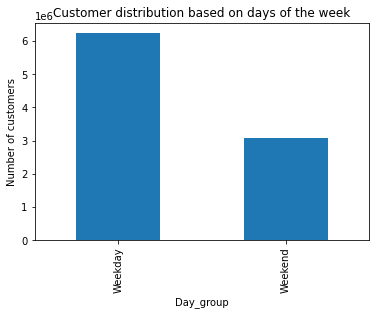

In [62]:
# Adding labels and title
plt.xlabel('Day_group')
plt.ylabel('Number of customers')
plt.title('Customer distribution based on days of the week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar = df_regular_activity ['day_group'].value_counts().plot.bar()

In [63]:
#Exporting the figure
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_group.png'))

### 04e. Checking distribution based on order hour of day

In [64]:
print(df_regular_activity['order_hour_of_day'].unique())

[ 8 12  7  9 15 16 14 20 19 17 18 21  5 11 22 13  6 10 23  0  1  4  3  2]


In [65]:
# Assigning 'Hour_group' based on 'order_hour_of_day'
df_regular_activity.loc[df_regular_activity['order_hour_of_day'].isin([0, 1, 2, 3, 4, 5, 6]), 'hour_group'] = 'Dawn_orders'
df_regular_activity.loc[df_regular_activity['order_hour_of_day'].isin([7, 8, 9, 10, 11]), 'hour_group'] = 'Morning_orders'
df_regular_activity.loc[df_regular_activity['order_hour_of_day'].isin([12, 1, 2, 3]), 'hour_group'] = 'Noon_orders'
df_regular_activity.loc[df_regular_activity['order_hour_of_day'].isin([4, 5, 6, 7, 8, 9, 10, 11]), 'hour_group'] = 'Night_orders'

/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/renubalaji/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [66]:
df_regular_activity.head(5)

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,fam_status,income,_merge,region,exclusion_flag,age_group,income_groups,departmental_groups,day_group,hour_group
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Noon_orders
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Food_items,Weekday,Night_orders


In [69]:
df_regular_activity['hour_group'].value_counts(dropna = False)

NaN             5245665
Night_orders    3174047
Noon_orders      816110
Dawn_orders       62623
Name: hour_group, dtype: int64

It has to be noted down that there are many missing values in this particular column probably because it was forgotten to be noted down or there might be some data corruption. 

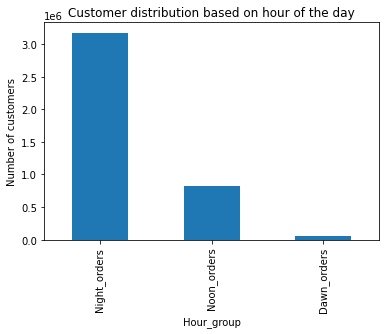

In [70]:
# Adding labels and title
plt.xlabel('Hour_group')
plt.ylabel('Number of customers')
plt.title('Customer distribution based on hour of the day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar = df_regular_activity ['hour_group'].value_counts().plot.bar()

In [71]:
#Exporting the figure
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour_group.png'))

In [72]:
#Exporting the data set
df_regular_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'df_regular_activity_new.pkl'))

In [73]:
df_final_dataset=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'df_regular_activity_new.pkl'))

In [74]:
df_final_dataset.head(5)

,department_id,prices,order_id,eval_set,orders_day_of_week,order_hour_of_day,days_since_prior_order,reordered,price_range_loc,busiest day,...,fam_status,income,_merge,region,exclusion_flag,age_group,income_groups,departmental_groups,day_group,hour_group
user_id,,,,,,,,,,,,,,,,,,,,,
1,7,9.0,2539329,prior,2,8,NaN,0,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,7,9.0,473747,prior,3,12,21.0,1,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Noon_orders
1,7,9.0,2254736,prior,4,7,29.0,1,Mid-range product,Least busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,7,9.0,550135,prior,1,9,20.0,1,Mid-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Beverages,Weekday,Night_orders
1,19,3.0,2398795,prior,3,7,15.0,0,Low-range product,Regularly busy,...,married,40423,both,South,high_orders,Middle-aged Adult,Low_income,Food_items,Weekday,Night_orders


## 05 Aggregating the max, mean and min variables on a customer-profile level

In [75]:
# Creating subset
df_final_subset = df_final_dataset.groupby(['user_id', 'age_group', 'income_groups', 'hour_group', 'loyalty_flag', 'region', 'order_id', 'days_since_prior_order'])['prices'].sum().reset_index()

In [76]:
df_final_subset.head()

,user_id,age_group,income_groups,hour_group,loyalty_flag,region,order_id,days_since_prior_order,prices
0,1,Middle-aged Adult,Low_income,Night_orders,New customer,South,550135,20.0,13.0
1,1,Middle-aged Adult,Low_income,Night_orders,New customer,South,2254736,29.0,16.4
2,1,Middle-aged Adult,Low_income,Night_orders,New customer,South,2398795,15.0,7.4
3,1,Middle-aged Adult,Low_income,Night_orders,New customer,South,2550362,30.0,14.7
4,1,Middle-aged Adult,Low_income,Noon_orders,New customer,South,473747,21.0,13.4


In [77]:
aggregations_age = df_final_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [78]:
aggregations_age

days_since_prior_order                  prices             \
                                     min       mean   max    min       mean   
age_group                                                                     
Middle-aged Adult                    0.0  10.349937  30.0    1.0  43.512090   
Senior                               0.0  10.368267  30.0    1.0  40.949049   
Young Adult                          0.0  10.380389  30.0    1.0  42.203439   

                             
                        max  
age_group                    
Middle-aged Adult  100106.4  
Senior             100117.1  
Young Adult        100064.7

Maximum prices does not seem correct hence it has to be filtered out. 

In [79]:
aggregations_income = df_final_subset.groupby('income_groups').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [80]:
aggregations_income

days_since_prior_order                  prices             \
                                 min       mean   max    min       mean   
income_groups                                                             
High_income                      0.0  10.261898  30.0    1.0  61.350832   
Low_income                       0.0  10.965345  30.0    1.0  19.731366   
Middle_income                    0.0  10.270274  30.0    1.0  29.951713   

                         
                    max  
income_groups            
High_income    100117.1  
Low_income        286.9  
Middle_income  100054.2

High_income Group: The maximum price of 100117.1 might suggest some very high-value transactions, potentially outliers or expensive products/services within this income group. It would be important to verify if these prices are legitimate or if they represent outliers that need to be handled separately.

Low_income Group: The maximum price of 286.9 also suggests some higher-cost items relative to the mean price but is significantly lower than the high-income group's maximum.

Middle_income Group: Similarly, the maximum price of 100054.2 indicates there are high-value transactions, though slightly lower than the high-income group's maximum.

In [81]:
aggregations_hour = df_final_subset.groupby('hour_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [82]:
aggregations_hour

days_since_prior_order                  prices             \
                                min       mean   max    min       mean   
hour_group                                                               
Dawn_orders                     0.0  11.240935  30.0    1.0  42.965500   
Night_orders                    0.0  10.276532  30.0    1.0  42.611162   
Noon_orders                     0.0  10.630578  30.0    1.0  41.385835   

                        
                   max  
hour_group              
Dawn_orders   100031.6  
Night_orders  100117.1  
Noon_orders   100078.3

The maximum prices indicates there are high-value transactions which could be outliers due to wrongly typed values. 

In [83]:
aggregations_region = df_final_subset.groupby('region').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [84]:
aggregations_region

days_since_prior_order                  prices                     
                             min       mean   max    min       mean       max
region                                                                       
Midwest                      0.0  10.479521  30.0    1.0  43.279600  100106.4
Northeast                    0.0  10.316245  30.0    1.0  41.440067  100117.1
South                        0.0  10.338905  30.0    1.0  46.059866  100104.5
West                         0.0  10.317708  30.0    1.0  37.358345  100100.9

The maximum prices indicates there are high-value transactions which could be outliers due to wrongly typed values. 

## 06 Comparing customer profiles with regions and departments

In [85]:
# Creating crosstab for region and age group

department_region = pd.crosstab(df_final_dataset['region'], df_final_dataset['departmental_groups'], dropna = False)

In [86]:
department_region

departmental_groups,Beverages,Food_items,Others
region,,,
Midwest,189711,1847155,143066
Northeast,145457,1389657,107155
South,272341,2622421,201277
West,206261,2021278,152666


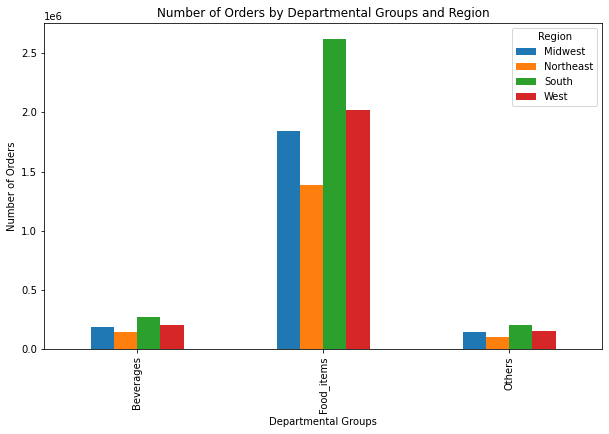

In [87]:
data = {
    'departmental_groups': ['Beverages', 'Food_items', 'Others'],
    'Midwest': [189711, 1847155, 143066],
    'Northeast': [145457, 1389657, 107155],
    'South': [272341, 2622421, 201277],
    'West': [206261, 2021278, 152666]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df.set_index('departmental_groups', inplace=True)

# Plotting
df.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Departmental Groups')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Departmental Groups and Region')

# Save the plot as an image file (e.g., PNG)
plt.savefig('orders_by_department.png')

# Show plot
plt.legend(title='Region')
plt.show()

In [88]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_departmental_groups.png'))

<Figure size 432x288 with 0 Axes>

## 07 Comparing age group vs income of customers

income_groups      High_income  Low_income  Middle_income
age_group                                                
Middle-aged Adult   134.044705  111.779172     138.258662
Senior              135.158483  111.812134     130.096721
Young Adult         133.237083  112.421421     135.466417


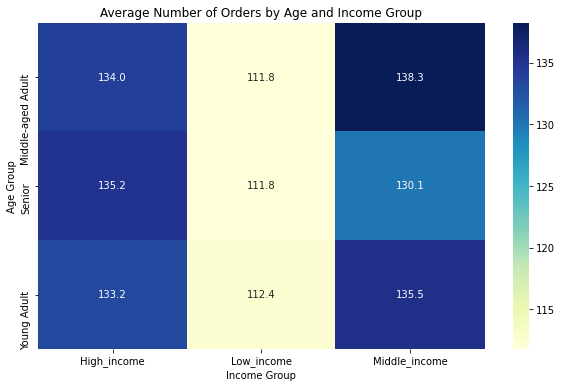

In [93]:
# Assuming df_regular_activity is your existing DataFrame with 'income_group' and 'age_group' columns

# Count the number of orders for each user
df_order_counts = df_regular_activity.groupby('user_id').size().reset_index(name='order_count')
df_combined = df_regular_activity.merge(df_order_counts, on='user_id', how='left')

# Create a pivot table
pivot_table = pd.pivot_table(
    df_combined,
    values='order_count',
    index='age_group',
    columns='income_groups',
    aggfunc='mean'
)
print(pivot_table)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Number of Orders by Age and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Age Group')
plt.show()

income_groups      High_income  Low_income  Middle_income
age_group                                                
Middle-aged Adult      1984946      454082        1791565
Senior                 2220941      262336         692692
Young Adult              58874      293519        1539490


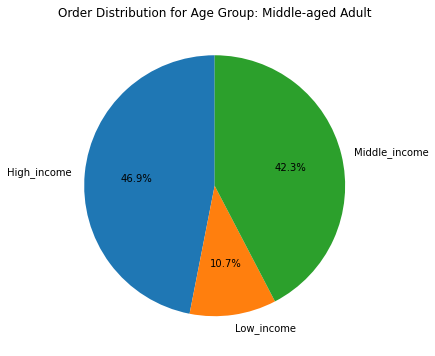

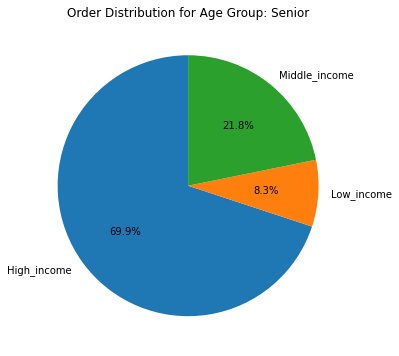

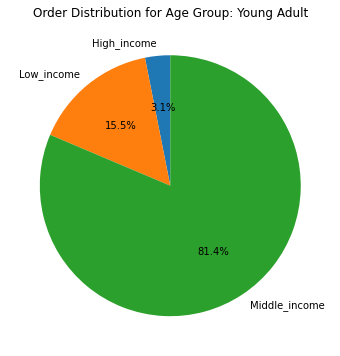

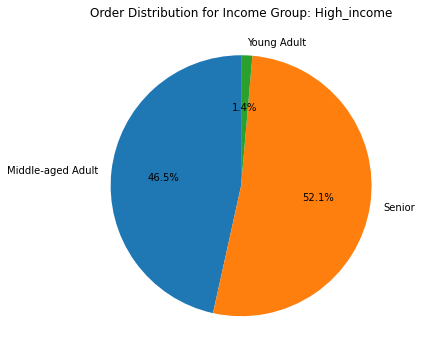

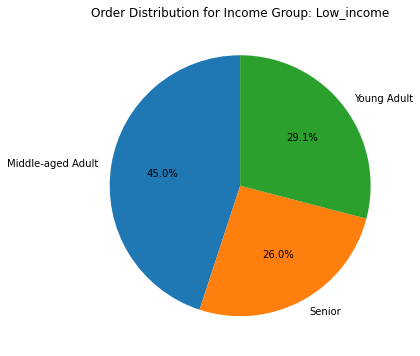

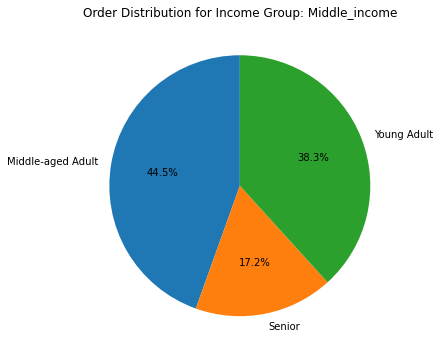

In [95]:
# Create a pivot table for value counts
pivot_table = pd.pivot_table(
    df_regular_activity,
    values='order_id',  # Assuming 'order_id' is unique for each order
    index='age_group',
    columns='income_groups',
    aggfunc='count',
    fill_value=0  # Fill NaN with 0
)
print(pivot_table)

# Plot pie charts for each age group
for age_group in pivot_table.index:
    plt.figure(figsize=(8, 6))
    pivot_table.loc[age_group].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Order Distribution for Age Group: {age_group}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

# Plot pie charts for each income group
for income_group in pivot_table.columns:
    plt.figure(figsize=(8, 6))
    pivot_table[income_group].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Order Distribution for Income Group: {income_group}')
    plt.ylabel('')  # Hide the y-label
    plt.show()


In [96]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'pie_age_group_{age_group}.png'))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'pie_income_group_{income_group}.png'))

<Figure size 432x288 with 0 Axes>